# Bringing it all Together - Animations in Matplotlib

In this final exercise we are going to make use of all the skills you have developed in Python today, and approximate pi with a nice matplotlib animation.

In this example we are going to approximate pi by calculating the difference in the area of a unit square and a unit circle. We shall do this by randomly picking a point inside the unit square and determining if that point is inside the unit circle contained within the square. The ratio of points inside both the square and the circle to the ratio of points only in the square will allow us to approximate pi.

First we will introduce you to the matplotlib animation module.

# Challenge 1

Approximate pi by the Monte Carlo method in a for loop. For each iteration of the loop you will need to generate a random x and y coordinate of your point (between 0 and 1), and then calculate if this is inside the circule of radius 1. You can then approximate $\pi$ using the following equation:

$$
\pi = \frac{\text{number of points in circle}}{\text{total number of points}}
$$

You will probably find [`numpy.random.rand()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.rand.html) and [`numpy.sqrt()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.sqrt.html) useful.

Print the approximation at each step to see it getting more accurate.

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def whatispi(npoints):
    """Returns the number of points in circle quadrant, x,y in [0,1]"""
    assert type(npoints) == int
    assert npoints >= 1
    # initialise the count
    c_count=0
    # loop over all points and check if coord lies in range
    for i in range(1,npoints+1):
        randx = np.random.rand()
        randy = np.random.rand()
        myr=np.sqrt(randx*randx+randy*randy)
        if myr < 1.0:
            #print('Inside circle')
            c_count=c_count+1
    # note *4 because we only have one quadrant of a circle
    return 4.0*c_count/npoints

print(whatispi(1))
print(whatispi(10))


4.0
2.4


In [ ]:
help(whatispi)

## Animations

Matplotlib supports animation of all of its figure types. We will show you an example here.

First things first, we need to import Animation.

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as ani

So animation plotting is based off creating a function. So in this case, we are animating a line plot.

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi,1000)
y = np.sin(x)

line, = ax.plot(x,y)
#line = ax.plot(x,y)[0]

In [ ]:
def update(i):
    global line
    shift = np.pi/50
    x = np.linspace(0,6*np.pi,1000)
    y = np.sin(x+i*shift)
    
    return line.set_data(x,y)

In [ ]:
def update(i):
    global line
    shift = np.pi/50
    x = np.linspace(0,6*np.pi,1000)
    y = np.sin(x+i*shift)
    
    return line.set_data(x,y)
anim = ani.FuncAnimation(fig,update,frames=100)

In [ ]:
plt.show()

This works! Animating a 2D image is similar. Except in the animate function, you will set both x and y data.

# Challenge 2

Modify your $\pi$ calculation to animate as it calculates pi. 

You can plot the circle of the line using the equation:
$$
x^2 + y^2 = 1
$$

Set the title of your plot to be the running approximation of $\pi$.

<IPython.core.display.Javascript object>


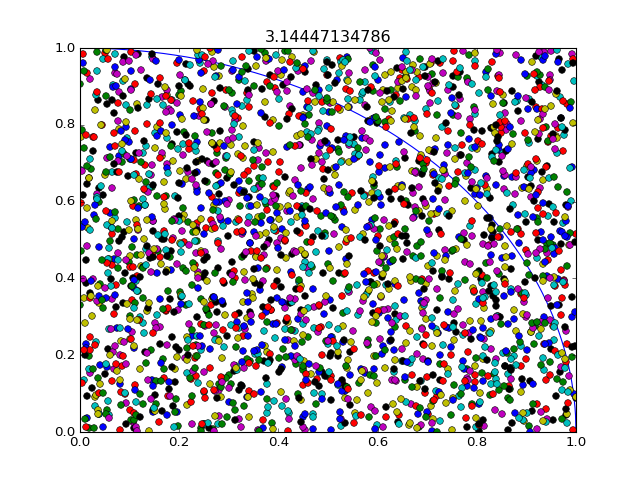

In [3]:
npoints=100
runningpi=0 
c_count=0
n_count=0
fig, ax = plt.subplots()
x = np.linspace(0,1,1000)
y = np.sqrt(1-x*x)

line, = ax.plot(x,y)
#line = ax.plot(x,y)[0]

In [4]:
def update(i):
    #global npoints
    global c_count
    global n_count
    randx = np.random.rand()
    randy = np.random.rand()
    myr=np.sqrt(randx*randx+randy*randy)
    if myr < 1.0:
        c_count=c_count+1
    n_count += 1    
    runningpi=4.0*c_count/n_count
    plt.title(runningpi)
    return plt.plot(randx,randy,'o')

In [5]:
anim = ani.FuncAnimation(fig,update,frames=npoints)

In [6]:
plt.show()

In [ ]:
# example given by demonstrators
fig, ax = plt.subplots()

points_in = 0
points_all = 0
def calculate_point(i):
    global points_in, points_all
    x = np.random.rand()
    y = np.random.rand()
    
    r = np.sqrt(x**2 + y**2)
    
    if r <= 1:
        points_in += 1
        ax.plot(x, y, 'bo')
    else:
        ax.plot(x, y, 'ro')
        
    points_all += 1
    pi_4 = points_in / points_all
    pi = pi_4 * 4
    
    plt.title("pi ={:.20f} of {}".format(pi,points_all))
    

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0,1,1000)
y = np.sqrt(1-x*x)

line, = ax.plot(x,y)
anim = ani.FuncAnimation(fig,calculate_point,frames=100, interval=10)
plt.show()

There is a further IPython Notebook talking about this in more detail.